In [ ]:
## Jared Patel and Aayushi Choudhary

from google.colab import files
uploaded = files.upload()


Saving winequality-red.csv to winequality-red (2).csv


In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import os as os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

wine = pd.read_csv('winequality-red.csv')


In [ ]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(wine, test_size=0.25, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.4, random_state=42)

In [ ]:
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
582,11.7,0.490,0.49,2.2,0.083,5,15,1.00000,3.19,0.43,9.2,5
626,8.8,0.600,0.29,2.2,0.098,5,15,0.99880,3.36,0.49,9.1,5
1030,7.1,0.590,0.00,2.1,0.091,9,14,0.99488,3.42,0.55,11.5,7
620,8.3,0.540,0.24,3.4,0.076,16,112,0.99760,3.27,0.61,9.4,5
490,9.3,0.775,0.27,2.8,0.078,24,56,0.99840,3.31,0.67,10.6,6


In [ ]:
X_train = train_data.drop('quality', axis=1).values
y_train = train_data['quality'].values

X_test = test_data.drop('quality', axis=1).values
y_test = test_data['quality'].values

# Add bias (intercept)
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]

In [ ]:
#XT X
XT_X_train = np.dot(X_train_bias.T, X_train_bias)

#inverse of X^T X
XT_X_inv_train = np.linalg.inv(XT_X_train)

#X^T y
XT_y_train = np.dot(X_train_bias.T, y_train)

# intercept and coefficients for all features
w_train = np.dot(XT_X_inv_train, XT_y_train)
int_train = w_train[0]  # Intercept
coeff_train = w_train[1:]

X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]


In [ ]:

coeff_train = np.insert(coeff_train, 0, 1)
coeff_train

array([ 1.00000000e+00,  2.18249166e-02, -1.00850118e+00, -1.33666631e-01,
        8.83723173e-03, -1.75600572e+00,  5.02961462e-03, -3.65946705e-03,
       -1.61976750e+01, -3.44220972e-01,  8.19786098e-01,  2.86231426e-01])

In [ ]:
def predict(X, intercept, coefficients):
    return intercept + np.dot(X, coefficients)

# Predict test data
y_pred_train = predict(X_train_bias, int_train, coeff_train)
y_pred_test = predict(X_test_bias, int_train, coeff_train)

# sum-of-squares error on test set
error_test = np.mean((y_test - y_pred_test) ** 2)

error_test = np.sqrt(error_test)
error_test # 1.1015411434233293
error_train = np.mean((y_train - y_pred_train) ** 2)

error_train = np.sqrt(error_train)
error_train # 1.1947462692925692


1.1947418879484233

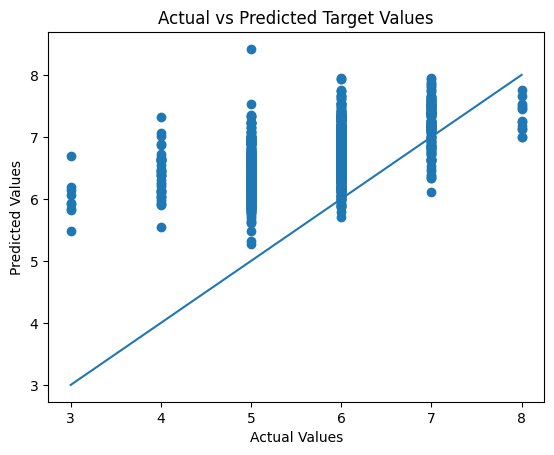

In [ ]:
import matplotlib.pyplot as plt
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
y_pred_train = predict(X_train_bias, int_train, coeff_train)

plt.scatter(y_train, y_pred_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Target Values')
plt.show()


The line y = x helps to see which actual values are similar to the predicted values. Values closer to the line are closer in val

In [ ]:
learning_rate = 0.0001  # Step size
iterations = 100
np.random.seed(42)
weights = np.random.rand(X_train_bias.shape[1])

We found that the learning rate had to be extremely small or the prediction values would be too high and tend towards infinity.

In [ ]:
for _ in range(iterations):
    y_pred = np.dot(X_train_bias, weights)
    y_pred
    error = y_train - y_pred
    weights += learning_rate * np.dot(X_train_bias.T, error) / len(y_train)

#making predictions
y_test_pred = np.dot(X_test_bias, weights)
y_test_pred

y_train_pred = np.dot(X_train_bias, weights)
y_train_pred


array([12.86541182, 11.24513855, 10.42207049, ...,  5.30259974,
       11.36627546, 12.18811849])

In [ ]:
test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
test_rmse #4.286656518276518
train_rmse = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
train_rmse #2.69107611311479

4.31039793044176

(160,)